Welcome to this notebook, where I build a machine learning model to predict sales in a grocery store. 

I prepared this notebook as preparation for the Kaggle competition: "Store Sales - Time Series Forecasting" (https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview). Originally, for this competition, there is a train and test data set, where the test data set does not contain the actual sales values which the model is supposed to predict. One has to make their own predictions and submit it to Kaggle, where a score is computed. However, in this notebook, I split the training data set into training and test, as I also want to show how well the model fares in the plots, which would not be possible with the original data set.

In this notebook, I will use time-series forecasting to predict the sales using data from Corporación Favorita, a large Ecuadorian-based grocery retailer. This data is available on the page of the above competition on Kaggle, but it can also be found in this repository.

In this notebook, I only make use of Linear Regression in order to train the model. Please feel free to also check out the file "fit_hybrid.ipynb" in the same repository, where I use multiple machine learning techniques to improve the forecasting.

In [26]:
# importing pandas to read the data
import pandas as pd
full_set = pd.read_csv("train.csv", parse_dates=["date"]) # originally intended for training, but here I split it, so I call it full_set

full_set["date"] = pd.to_datetime(full_set["date"]) # converting the date column to pandas datetype

train_test_split_date = pd.to_datetime("2017-07-31") # the date to split the data into train and test

train_set = full_set[full_set["date"]<=train_test_split_date]
test_set = full_set[full_set["date"]>train_test_split_date]

train_set["date"] = pd.to_datetime(train_set["date"])
test_set["date"] = pd.to_datetime(test_set["date"])

C:\Users\saiha\AppData\Local\Temp\ipykernel_25520\467682877.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["date"] = pd.to_datetime(train_set["date"])
C:\Users\saiha\AppData\Local\Temp\ipykernel_25520\467682877.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["date"] = pd.to_datetime(test_set["date"])


In [10]:
train_set # viewing the dataset

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
2974153,2974153,2017-07-31,9,POULTRY,470.513,1
2974154,2974154,2017-07-31,9,PREPARED FOODS,61.940,0
2974155,2974155,2017-07-31,9,PRODUCE,1517.552,6
2974156,2974156,2017-07-31,9,SCHOOL AND OFFICE SUPPLIES,56.000,6


In the above dataset, we can see that apart from the date, we have two columns, namely "sales" and "family", which are types or categories. As we are using linear regression, it would make sense to use one-hot encoding to capture the different categories and this can easily be done on pnadas using pd.get_dummies(). Leaving "onpromotion" as it is, as it contains the number of products under promotion, which is a number.

In [11]:
train_set_encoded = pd.get_dummies(train_set, columns=["family","store_nbr"])

# removing the first categories in each to avoid auto-collinearity
train_set_encoded = train_set_encoded.drop(columns=["family_AUTOMOTIVE","store_nbr_1"]) 
train_set_encoded

,id,date,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54
0,0,2013-01-01,0.000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2013-01-01,0.000,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2013-01-01,0.000,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2013-01-01,0.000,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2013-01-01,0.000,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974153,2974153,2017-07-31,470.513,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2974154,2974154,2017-07-31,61.940,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2974155,2974155,2017-07-31,1517.552,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2974156,2974156,2017-07-31,56.000,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
y = train_set_encoded["sales"].values # extracting the sales out as this is what we want to predict

train_set_encoded = train_set_encoded.drop(columns="sales") # dropping sales here, as I will continue using this as the input vector

To better understand how to model the overall dependence on time, it is better to make a plot of the average sales first.

Text(0.5, 1.0, 'Average sales')

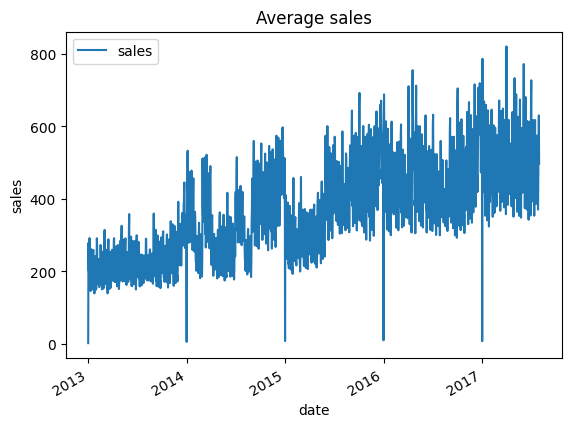

In [13]:
import matplotlib.pyplot as plt

average_sales = train_set.loc[:,["date","sales"]].groupby("date").mean()

average_sales.plot()
plt.ylabel("sales")
plt.title("Average sales")

It looks like there is an overall seemingly linear increase in sales over the years. There is also a feature of seasonality, to see which frequencies are the strongest, we can plot a periodogram

Text(0.5, 1.0, 'Periodogram')

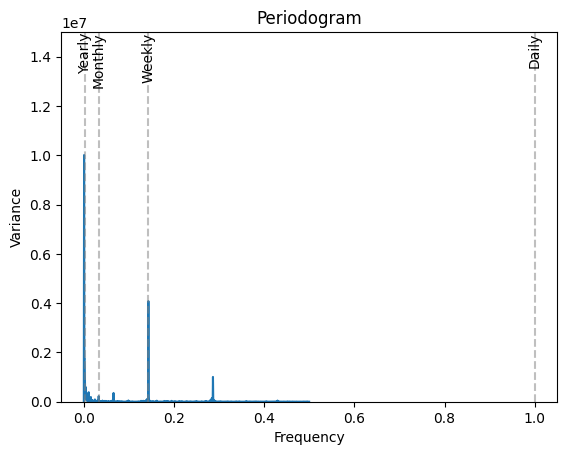

In [14]:
from scipy.signal import periodogram
frequencies, power = periodogram(average_sales["sales"], fs=1.0)

periods = {
    "Yearly": 1/365,
    "Monthly": 1/30,
    "Weekly": 1/7,
    "Daily": 1
}

plt.plot(frequencies,power)

plt.ylim([0,1.5e7])

for label, freq in periods.items():
    plt.axvline(x=freq, color='gray', linestyle='--', alpha=0.5)
    plt.text(freq, plt.ylim()[1]*1, label, rotation=90, color='black', va='top', ha='center')


plt.xlabel("Frequency")
plt.ylabel("Variance")
plt.title("Periodogram")

The above plot shows that seasonality over a period of a year has the highest power, after that another peak for weekly variations are evident. So based on the above two plots, we can use a linear trend and Fourier (sine and cos) terms at yearly and weekly frequencies to capture the effects of time. To generate these time dummies and Fourier terms, I have used the modules "DeterministicProcess" and "CalenderFourier" in the library "statsmodels"

In [15]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

unique_dates = pd.date_range(start=train_set["date"].min(), end=train_set["date"].max(), freq="D")


# Using DeterministicProcess to generate time dummies (linear and quadratic with order=2) 
# and two Fourier elements for seasonal effects at yearly and weekly frequencies  

fourier1 = CalendarFourier(freq="YE", order=1)  
fourier2 = CalendarFourier(freq="W", order=1)  

train_set_copy = train_set.copy()
train_set_copy.set_index("date")

dp = DeterministicProcess(
    index=unique_dates,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    additional_terms=[fourier1,fourier2],  
    drop=True,           # drop terms if necessary to avoid collinearity
)

X_trend_season = dp.in_sample()

In [16]:
X_trend_season

,const,trend,"sin(1,freq=YE-DEC)","cos(1,freq=YE-DEC)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)"
2013-01-01,1.0,1.0,0.000000,1.000000,0.781831,0.623490
2013-01-02,1.0,2.0,0.017213,0.999852,0.974928,-0.222521
2013-01-03,1.0,3.0,0.034422,0.999407,0.433884,-0.900969
2013-01-04,1.0,4.0,0.051620,0.998667,-0.433884,-0.900969
2013-01-05,1.0,5.0,0.068802,0.997630,-0.974928,-0.222521
...,...,...,...,...,...,...
2017-07-27,1.0,1669.0,-0.409356,-0.912375,0.433884,-0.900969
2017-07-28,1.0,1670.0,-0.425000,-0.905193,-0.433884,-0.900969
2017-07-29,1.0,1671.0,-0.440519,-0.897743,-0.974928,-0.222521
2017-07-30,1.0,1672.0,-0.455907,-0.890028,-0.781831,0.623490


In the variable "X_trend_season" we can see the time dummy "trend" and the two Fourier terms (one sine and one cos each), however here we only have one entry for each date, that is not the case with our original training set, so we will have to merge "X_trend_season" with "train_set_encoded" to include the terms which model the evolution with time

In [ ]:
X = train_set_encoded.merge(X_trend_season, left_on="date", right_index=True, how="left")
X

,id,date,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,const,trend,"sin(1,freq=YE-DEC)","cos(1,freq=YE-DEC)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)"
0,0,2013-01-01,0,False,False,False,False,False,False,False,...,False,False,False,False,1.0,1.0,0.00000,1.000000,0.781831,0.62349
1,1,2013-01-01,0,True,False,False,False,False,False,False,...,False,False,False,False,1.0,1.0,0.00000,1.000000,0.781831,0.62349
2,2,2013-01-01,0,False,True,False,False,False,False,False,...,False,False,False,False,1.0,1.0,0.00000,1.000000,0.781831,0.62349
3,3,2013-01-01,0,False,False,True,False,False,False,False,...,False,False,False,False,1.0,1.0,0.00000,1.000000,0.781831,0.62349
4,4,2013-01-01,0,False,False,False,True,False,False,False,...,False,False,False,False,1.0,1.0,0.00000,1.000000,0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974153,2974153,2017-07-31,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,1673.0,-0.47116,-0.882048,0.000000,1.00000
2974154,2974154,2017-07-31,0,False,False,False,False,False,False,False,...,False,False,False,False,1.0,1673.0,-0.47116,-0.882048,0.000000,1.00000
2974155,2974155,2017-07-31,6,False,False,False,False,False,False,False,...,False,False,False,False,1.0,1673.0,-0.47116,-0.882048,0.000000,1.00000
2974156,2974156,2017-07-31,6,False,False,False,False,False,False,False,...,False,False,False,False,1.0,1673.0,-0.47116,-0.882048,0.000000,1.00000


So now we have both the terms which capture the time evolution (trend and seasonality) and the categories (through the one-hot encoded terms)

In [19]:
X = X.set_index("date")

X = X.drop(columns="id")

Now we are in a position to fit the inputs (X) with the target (y)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

In [22]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({"predicted_sales":y_pred},index=X.index)
y_pred

,predicted_sales
date,
2013-01-01,-195.565572
2013-01-01,-200.633044
2013-01-01,-199.514268
2013-01-01,2003.047532
2013-01-01,-200.661590
...,...
2017-07-31,553.046348
2017-07-31,318.099239
2017-07-31,1462.572156


In [23]:
y = pd.DataFrame({"traget_sales":y},index=X.index)
y

,traget_sales
date,
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
...,...
2017-07-31,470.513
2017-07-31,61.940
2017-07-31,1517.552


Text(0, 0.5, 'Sales')

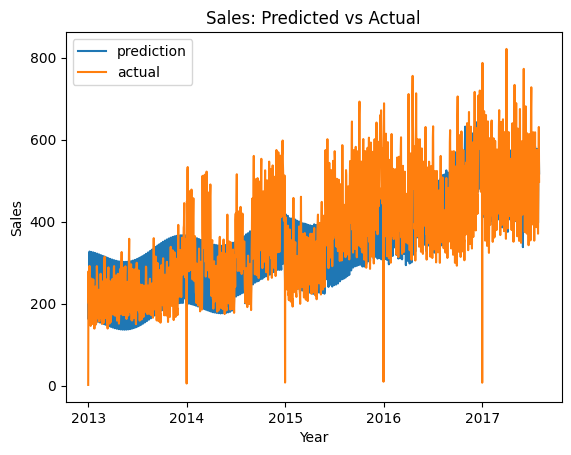

In [27]:
y_avg = y.groupby("date").mean()
y_pred_avg = y_pred.groupby("date").mean()

plt.plot(y_pred_avg,label='prediction')
plt.plot(y_avg,label='actual')
plt.legend()
plt.title("Sales: Predicted vs Actual")
plt.xlabel("Year")
plt.ylabel("Sales")

We can see that the fit might be capturing some of the overall time evolution, but it still lacks in capturing a lot of other information.

Now we can also fit the model to the test data

In [29]:
# preparing the test data

test_set_encoded = pd.get_dummies(test_set, columns=["family","store_nbr"])

y_test = test_set_encoded["sales"].values

test_set_encoded = test_set_encoded.drop(columns=["family_AUTOMOTIVE","store_nbr_1","sales"])

In [30]:
test_set

,id,date,store_nbr,family,sales,onpromotion
2974158,2974158,2017-08-01,1,AUTOMOTIVE,5.000,0
2974159,2974159,2017-08-01,1,BABY CARE,0.000,0
2974160,2974160,2017-08-01,1,BEAUTY,4.000,0
2974161,2974161,2017-08-01,1,BEVERAGES,2627.000,26
2974162,2974162,2017-08-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [31]:
unique_dates_testset = pd.date_range(start=test_set["date"].min(), end=test_set["date"].max(), freq="D")


# Using DeterministicProcess to generate time dummies (linear and quadratic with order=2) 
# and two Fourier elements for seasonal effects at yearly and weekly frequencies  

fourier1 = CalendarFourier(freq="YE", order=1)  
fourier2 = CalendarFourier(freq="W", order=1)  

# test_set_copy = test_set.copy()
# test_set_copy.set_index("date")

dp = DeterministicProcess(
    index=unique_dates_testset,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    additional_terms=[fourier1,fourier2],  
    drop=True,           # drop terms if necessary to avoid collinearity
)

X_trend_season_test = dp.in_sample()

In [32]:
X_test = test_set_encoded.merge(X_trend_season_test, left_on="date", right_index=True, how="left")

In [35]:
# index_series_test = test_set["id"]

X_test = X_test.set_index("date")

X_test = X_test.drop(columns="id")

# test_set

In [36]:
X_test

,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,...,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,const,trend,"sin(1,freq=YE-DEC)","cos(1,freq=YE-DEC)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)"
date,,,,,,,,,,,,,,,,,,,,,
2017-08-01,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1.0,1.0,-0.486273,-0.873807,0.781831,0.62349
2017-08-01,0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,1.0,1.0,-0.486273,-0.873807,0.781831,0.62349
2017-08-01,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,1.0,1.0,-0.486273,-0.873807,0.781831,0.62349
2017-08-01,26,False,False,True,False,False,False,False,False,False,...,False,False,False,False,1.0,1.0,-0.486273,-0.873807,0.781831,0.62349
2017-08-01,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,1.0,1.0,-0.486273,-0.873807,0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1.0,15.0,-0.680773,-0.732494,0.781831,0.62349
2017-08-15,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1.0,15.0,-0.680773,-0.732494,0.781831,0.62349
2017-08-15,148,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1.0,15.0,-0.680773,-0.732494,0.781831,0.62349


In [37]:
y_pred_test = model.predict(X_test)

In [39]:
y_pred_test = pd.DataFrame({"predicted_sales":y_pred_test},index=X_test.index)
y_test = pd.DataFrame({"predicted_sales":y_test},index=X_test.index)

Text(0, 0.5, 'Sales')

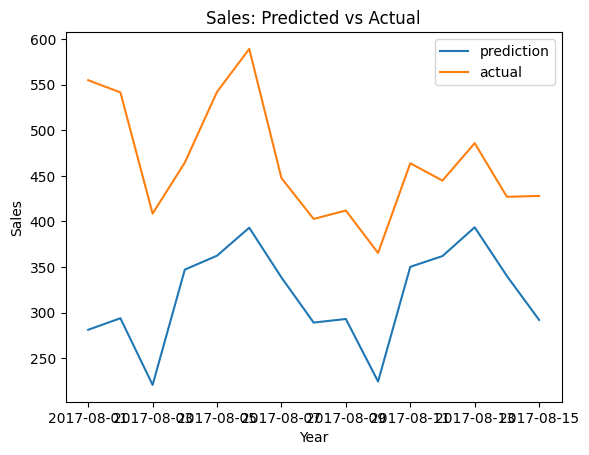

In [40]:
y_test_avg = y_test.groupby("date").mean()
y_pred_test_avg = y_pred_test.groupby("date").mean()

plt.plot(y_pred_test_avg,label='prediction')
plt.plot(y_test_avg,label='actual')
plt.legend()
plt.title("Sales: Predicted vs Actual")
plt.xlabel("Year")
plt.ylabel("Sales")

To improve the fits, one can deal with the categories "family" and "store_nbr" in the sales data set better by using different machine learning technqiues, like random forest or XGBoost. I will be doing this in the next jupyter notebook, with the name "fit_hybrid.ipynb" in the same directory.